In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
data_df = pd.read_csv(os.path.join('.','electric-cars.csv'))

In [5]:
data_df.head(3)

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

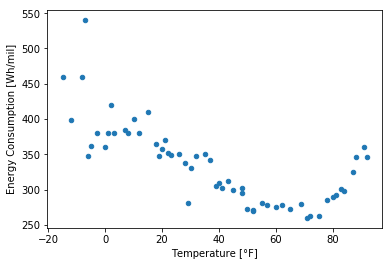

In [15]:
x = data_df.iloc[:,0].values
y = data_df.iloc[:,1].values

data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Create the object
pf_obj = PolynomialFeatures(degree=5, include_bias = False)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis] # (57,) -> (57,1)
)

print('Shape:', X2.shape) # (57, 3)

Shape: (57, 5)


In [35]:
# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)
# Prints: ['1', 'x0', 'x0^2']


Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']


In [36]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y);


In [37]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])


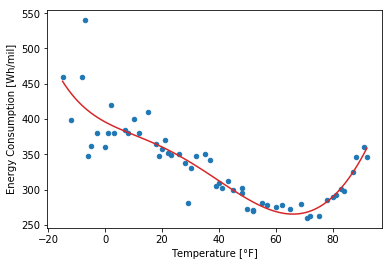

In [38]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3')
plt.show()
